In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [3]:
#Read the data
data = pd.read_excel('income.xlsx')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


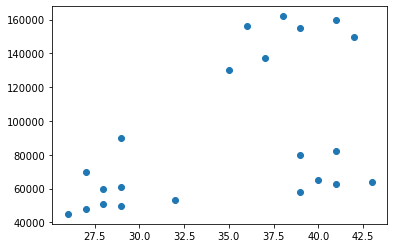

In [4]:
#plot the data for the rough cluster analysis
plt.scatter(data.Age,data['Income($)'])

In [5]:
#clustering algorithm
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predict = km.fit_predict(data[['Age','Income($)']])
y_predict

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
#add the predicted cluster to the dataset
data['cluster'] = y_predict

In [8]:
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
#divide the for each cluster
data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

Text(0, 0.5, 'Income')

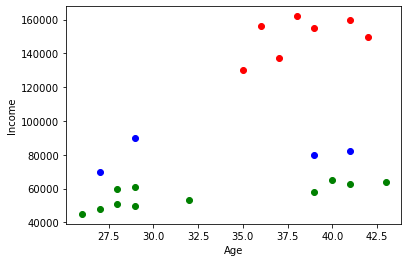

In [12]:
#plot the predicted clusters
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')

##### there are some mispredictions, need to scaledown the values

In [28]:
#normalization
scalar = MinMaxScaler()
scalar.fit(data[['Age']])

MinMaxScaler()

In [29]:
data['Age'] = scalar.transform(data[['Age']])

In [30]:
scalar.fit(data[['Income($)']])
data['Income($)'] = scalar.transform(data[['Income($)']])

In [31]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [33]:
y_predict = km.fit_predict(data[['Age','Income($)']])

In [34]:
#add newly predicted clusters to the dataset
data['cluster'] = y_predict

In [35]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


Text(0, 0.5, 'Income')

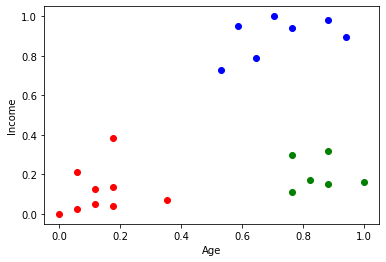

In [37]:
#divide the clusters and plot the graph

data1 = data[data.cluster==0]
data2 = data[data.cluster==1]
data3 = data[data.cluster==2]

plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='red')
plt.scatter(data3.Age,data3['Income($)'],color='blue')

plt.xlabel('Age')
plt.ylabel('Income')

#### predictions are accurate afer applying normalization

In [ ]:
### Procedure to find the number of (k) clusters(elbow method)

In [38]:

km_range = range(1,10)
sse = []
for k in km_range:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)

In [39]:
#sum of squared errors
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.21578607765873023,
 0.17299621932455464,
 0.1397684499538816,
 0.10383752586603562]

Text(0, 0.5, 'SSE')

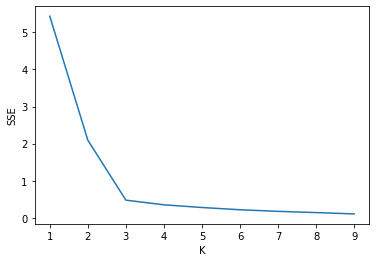

In [41]:
# plot the graph between K range and sse
plt.plot(km_range,sse)
plt.xlabel('K')
plt.ylabel('SSE')

#### from the above graph we can go with the k value as 3(at this value graph started flattening and we can also check by refering to elbow of our hand ) 